In [375]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import csv
import os
# Libraries for analysis anf plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

# Libraries for modelling
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, metrics, linear_model, feature_selection, preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## web scraping

In the following code:
1.I scraped the data from indeed australia website.
2.title, company,location, summary, salary were scraped.
3.datascientist,dataanalyst,dataengineer,keywords were used while scraping for both sydney and melbourne locations.
4.I followed a sequence of
meldatascientist,syddatascientist,meldataanalyst,syddataanalyst,meldataengineer,syddataengineer
and used same above words in with open('   '),file_is_empty('') lines of code.



In [ ]:
pages =list(np.arange(10,940,10))
with open('../Documents/indeed/syddataengineer.csv','a',newline='') as f_output:
    csv_print=csv.writer(f_output)
    file_is_empty=os.stat('../Documents/indeed/syddataengineer.csv').st_size == 0
    if file_is_empty:
        csv_print.writerow(['title','company','location','summary','salary'])
    for page in pages:
        source=requests.get('https://au.indeed.com/jobs?q=data+engineer&l=Sydney+NSW&start={}'.format(page)).text
        soup=BeautifulSoup(source,'lxml')
        for jobs in soup.find_all(class_='result'):
                try:
                    title=jobs.a.text.strip()
                except Exception as e:
                    title=None
                print('job_title: ',title)
                try:
                    company=jobs.span.text.strip()
                except Exception as e:
                    company=None
                print('company: ',company)
                try:
                    location=jobs.find('div',class_='location').text.strip()
                except Exception as e:
                    location=None
                print('location:',location)
                try:
                    summary=jobs.find('span',class_='summary').text.strip()
                except Exceptiona as e:
                    summary=None
                print(summary)
                try:
                    salary=jobs.find('span',class_='salary no-wrap').text.strip()
                except Exception as e:
                    salary=None
                print(salary)
                csv_print.writerow([title,company,location,summary,salary])
#print('_________________')
            

## data cleaning

In [2]:
#reading the melbourne datascientist file
mel_ds= pd.read_csv('meldatascientist.csv')

In [3]:
mel_ds.head()

,title,company,location,summary,salary
0,Senior Data Scientist - Belong,Telstra,Melbourne City Centre VIC,Ability to coach and mentor other data scienti...,NaN
1,Data Scientist,Cover Genius,Sydney NSW,We’re seeking a senior data scientist to suppo...,NaN
2,Data Scientist,Teradata,NaN,Data ScientistThe Data Scientist gathers intel...,NaN
3,Data Scientist,Culture Amp,NaN,"Your primary role will be to gather, analyse a...",NaN
4,Data Scientist,Omnicom Media Group,NaN,"As the Data Scientist, you'll play a critical ...",NaN


In [5]:
mel_ds.shape

(183, 5)

In [7]:
mel_ds['location'] = 'melbourne'

In [8]:
mel_ds.head()

,title,company,location,summary,salary
0,Senior Data Scientist - Belong,Telstra,melbourne,Ability to coach and mentor other data scienti...,NaN
1,Data Scientist,Cover Genius,melbourne,We’re seeking a senior data scientist to suppo...,NaN
2,Data Scientist,Teradata,melbourne,Data ScientistThe Data Scientist gathers intel...,NaN
3,Data Scientist,Culture Amp,melbourne,"Your primary role will be to gather, analyse a...",NaN
4,Data Scientist,Omnicom Media Group,melbourne,"As the Data Scientist, you'll play a critical ...",NaN


In [9]:
#reading the sydney datascientist file
syd_ds = pd.read_csv('syddatascientist.csv')

In [10]:
syd_ds['location'] = 'sydney'

In [11]:
syd_ds.head()

,title,company,location,summary,salary
0,Environmental Scientist - Boutique Environment...,Ascension Global,sydney,*About your new Company: * This national envir...,"$70,000 - $110,000 a year"
1,Data CoE Expressions of Interest,Optus,sydney,"In this newly created team, our Data Centre of...",NaN
2,Digital Data Quality Officer,Domain Group,sydney,Have the opportunity to work with a highly tal...,NaN
3,Data Scientist,Freshwater Group,sydney,The Data Scientist will:. Manage data sets. A ...,NaN
4,Data Scientist - Australian Market Leader,Datasii,sydney,Due to continued growth in the Data Science te...,"$120,000 - $135,000 a year"


In [12]:
#reading the melbourne dataanalyst file
mel_da = pd.read_csv('meldataanalyst.csv')

In [13]:
mel_da['location'] = 'sydney'

In [14]:
mel_da.head()

,title,company,location,summary,salary
0,Data Analyst,ANZ Banking Group,sydney,Data Analyst - Campaign Developer. The role wi...,NaN
1,Data Specialist and Scientist,Deakin University,sydney,This role requires an experienced Data Special...,NaN
2,Analyst - Enterprise Risk Tech Area - x2 Oppor...,ANZ Banking Group,sydney,Experience in data models and reporting packag...,NaN
3,Data Analyst,Metricon,sydney,Solid experience within a data/business analys...,NaN
4,Data Analyst,Hendry Group Pty Ltd,sydney,Have experience in building scalable data mode...,NaN


In [15]:
#reading the sydney dataanalyst file
syd_da = pd.read_csv('syddataanalyst.csv')

In [18]:
syd_da['location'] = 'sydney'

In [19]:
syd_da.head()

,title,company,location,summary,salary
0,Global Data - Mortgages Analyst - Sydney,Bloomberg,sydney,Mortgages Analyst - Sydney. Our Market Data An...,NaN
1,Operations Analyst - Marketplace,THE ICONIC,sydney,You have experience in operational process imp...,NaN
2,Data Analytics Analyst,IQVIA,sydney,"Manages health related data, updates and analy...",NaN
3,"Consumer Research & Data Analyst, Sydney",Mintel Group,sydney,Research and data consultancy:. Do you enjoy w...,NaN
4,Data and Information Analyst,Agency for Clinical Innovation,sydney,"Demonstrated high level skills to clean, struc...","$110,961 - $126,496 a year"


In [20]:
#reading the melbourne dataengineer file
mel_de = pd.read_csv('meldataengineer.csv')

In [21]:
mel_de['location'] = 'melbourne'

In [22]:
mel_de.head()

,title,company,location,summary,salary
0,Engineer,ANZ Banking Group,melbourne,Software Engineer Role. What you bring to the ...,NaN
1,Data Engineer,NAB - National Australia Bank,melbourne,We are current looking for Data Engineers to p...,NaN
2,Asset Engineer,Bayside Personnel,melbourne,Define and maintain accurate data of an electr...,NaN
3,Analytics Data Engineer,Bolster,melbourne,"Commercial data engineering experience, buildi...",NaN
4,Data DevOps Engineer,NAB - National Australia Bank,melbourne,We are looking for a DevOps engineer to build ...,NaN


In [23]:
#reading the sydney datasengineer file
syd_de = pd.read_csv('syddataengineer.csv')

In [24]:
syd_de['location'] = 'sydney'

In [25]:
syd_de.head()

,title,company,location,summary,salary
0,Field Service Commissioning Engineer,Addelec Power Services,sydney,Addelec Power Services are a specialised compa...,$45 - $60 an hour
1,Security Automation Engineer,THE ICONIC,sydney,"Engineer, implement, and monitor security syst...",NaN
2,Full Stack Software Engineer,THE ICONIC,sydney,We love to move fast and validate learning usi...,NaN
3,Data Engineer,Australian Broadcasting Corporation (ABC),sydney,Data Engineer PD.pdf. ABC Audiences are seekin...,"$120,000 a year"
4,Data Engineer - Internal Analytics,SafetyCulture,sydney,Collaborate closely with data infrastructure e...,NaN


### Data cleaning

Only a small proportion of the scraped data will have salary information and it is only this data I will need for modelling. The salary information is represented in several timescales, yearly, monthly, weekly and hourly. Some of the information is also represented as a range.

I will perform the following to extract and clean the salary data:

- Remove duplicate entries
- Delete rows that are missing data
- Only select salary information relating to year, month or week
- Convert salary information to a float (if in a range I will calculate the mean)
    - Round up monthly and weekly salaries to yearly (not the most accurate but is needed to maintain a workable amount of data for the modelling


In [372]:
#combined all the dataframes that were scraped individually based on locations and keywords and combined them all
df_full = pd.concat([mel_ds,syd_ds,mel_da,syd_da,mel_de,syd_de])

In [373]:
df_full.head()

,title,company,location,summary,salary
0,Senior Data Scientist - Belong,Telstra,melbourne,Ability to coach and mentor other data scienti...,NaN
1,Data Scientist,Cover Genius,melbourne,We’re seeking a senior data scientist to suppo...,NaN
2,Data Scientist,Teradata,melbourne,Data ScientistThe Data Scientist gathers intel...,NaN
3,Data Scientist,Culture Amp,melbourne,"Your primary role will be to gather, analyse a...",NaN
4,Data Scientist,Omnicom Media Group,melbourne,"As the Data Scientist, you'll play a critical ...",NaN


In [28]:
df_full.shape

(5729, 5)

In [29]:
df_full = df_full.drop_duplicates()

In [30]:
df_full.shape

(2698, 5)

In [374]:
#checking only title's containing data , DATA, Data, Machine
df_data = df_full.loc[df_full.title.str.contains("data") | df_full.title.str.contains("Data") | 
            df_full.title.str.contains("DATA")|df_full.title.str.contains("Machine")]

In [33]:
df_data.shape

(614, 5)

In [36]:
df_data

,title,company,location,summary,salary
0,Senior Data Scientist - Belong,Telstra,melbourne,Ability to coach and mentor other data scienti...,NaN
1,Data Scientist,Cover Genius,melbourne,We’re seeking a senior data scientist to suppo...,NaN
2,Data Scientist,Teradata,melbourne,Data ScientistThe Data Scientist gathers intel...,NaN
3,Data Scientist,Culture Amp,melbourne,"Your primary role will be to gather, analyse a...",NaN
4,Data Scientist,Omnicom Media Group,melbourne,"As the Data Scientist, you'll play a critical ...",NaN
5,Data Scientist - Sydney,Australian Red Cross,melbourne,Strong business data acumen with the ability t...,NaN
6,Data Scientist,THE ICONIC,melbourne,We are looking for an experienced Data Scienti...,NaN
7,Data Scientist,Tigerspike,melbourne,The successful candidate will be a Data Scient...,NaN
8,Data Scientist,Hyper Anna,melbourne,This is a client-facing role and you'll be the...,NaN
9,Senior Data Scientist,Algorithmic Trading Strategies Pty Ltd,melbourne,We are looking for an experienced Data Scienti...,"$180,000 - $200,000 a year"


In [38]:
df_data.reset_index(inplace=True)

In [41]:
df_data.drop(['index'], axis =1, inplace=True)

/Volumes/ravi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
df_data.head()

,title,company,location,summary,salary
0,Senior Data Scientist - Belong,Telstra,melbourne,Ability to coach and mentor other data scienti...,NaN
1,Data Scientist,Cover Genius,melbourne,We’re seeking a senior data scientist to suppo...,NaN
2,Data Scientist,Teradata,melbourne,Data ScientistThe Data Scientist gathers intel...,NaN
3,Data Scientist,Culture Amp,melbourne,"Your primary role will be to gather, analyse a...",NaN
4,Data Scientist,Omnicom Media Group,melbourne,"As the Data Scientist, you'll play a critical ...",NaN


462

In [45]:
df_data.to_csv('indeed614.csv',index = False)

In [377]:
#reading the data frame with no duplicates
df = pd.read_csv("indeed614.csv")

In [378]:
df.head()

,title,company,location,summary,salary
0,Senior Data Scientist - Belong,Telstra,melbourne,Ability to coach and mentor other data scienti...,NaN
1,Data Scientist,Cover Genius,melbourne,We’re seeking a senior data scientist to suppo...,NaN
2,Data Scientist,Teradata,melbourne,Data ScientistThe Data Scientist gathers intel...,NaN
3,Data Scientist,Culture Amp,melbourne,"Your primary role will be to gather, analyse a...",NaN
4,Data Scientist,Omnicom Media Group,melbourne,"As the Data Scientist, you'll play a critical ...",NaN


In [379]:
#checking the number of null values in salary column
df.salary.isnull().sum()

462

#### Selecting relevant salary information

In [380]:
# Redefine the dataframe to only include rows with salary information for yesr, month or week
df = df.loc[df.salary.str.contains("year") | df.salary.str.contains("month") | 
            df.salary.str.contains("week")|df.salary.str.contains("day")|df.salary.str.contains("hour")]

In [382]:
df.head()

,title,company,location,summary,salary
9,Senior Data Scientist,Algorithmic Trading Strategies Pty Ltd,melbourne,We are looking for an experienced Data Scienti...,"$180,000 - $200,000 a year"
10,Data Scientist,Freelancer.com,melbourne,Proven experience as a data scientist or analy...,"$65,000 - $110,000 a year"
12,Freelance Data Scientist,mOOvement,melbourne,Empowering cattle producers with real-time dat...,"$90,000 - $110,000 a year"
17,Data Scientist/ Engineer,Quantexa,melbourne,Work very closely with data scientists to ensu...,"$71,000 - $94,000 a year"
25,Data Scientist - Australian Market Leader,Datasii,melbourne,Due to continued growth in the Data Science te...,"$120,000 - $135,000 a year"


In [188]:
#checking the shape of dataframe, so that we can conclude the non missing values in salary column
df.shape

(152, 5)

In [383]:
#resetting index
df.reset_index(inplace = True)

In [190]:
df.drop(['index'], axis =1, inplace=True)

In [191]:
df.head()

,title,company,location,summary,salary
0,Senior Data Scientist,Algorithmic Trading Strategies Pty Ltd,melbourne,We are looking for an experienced Data Scienti...,"$180,000 - $200,000 a year"
1,Data Scientist,Freelancer.com,melbourne,Proven experience as a data scientist or analy...,"$65,000 - $110,000 a year"
2,Freelance Data Scientist,mOOvement,melbourne,Empowering cattle producers with real-time dat...,"$90,000 - $110,000 a year"
3,Data Scientist/ Engineer,Quantexa,melbourne,Work very closely with data scientists to ensu...,"$71,000 - $94,000 a year"
4,Data Scientist - Australian Market Leader,Datasii,melbourne,Due to continued growth in the Data Science te...,"$120,000 - $135,000 a year"


In [192]:
# This function converts the salary info into a float and rounds up the monthly and weekly salaries
def converter(salary):
    
    # Replace the non numerical characters with a blankspace
    salary = salary.replace('$', '') 
    salary = salary.replace(',', '')
    salary = salary.replace('−', ' ')
    
    # Converts yearly salaries to floats and calculates the mean if a range
    if salary.find('year') > -1:
        numerise = [int(s) for s in salary.split() if s.isdigit()]
        return np.mean(numerise)
    
    # Converts monthly salaries to floats, calculates the mean if a range and multiplies by 12
    elif salary.find('month') > -1 :
        get_digits = [int(s) for s in salary.split() if s.isdigit()]
        return (np.mean(get_digits))*12
    
    # Converts weekly salaries to floats, calculates the mean if a range and multiplies by 52
    elif salary.find('week') > -1 :
        get_digits = [int(s) for s in salary.split() if s.isdigit()]
        return (np.mean(get_digits))*52
    # Converts weekly salaries to floats, calculates the mean if a range and multiplies by 240
    
    elif salary.find('day') > -1 :
        get_digits = [int(s) for s in salary.split() if s.isdigit()]
        return (np.mean(get_digits))*240
    
    elif salary.find('hour') > -1 :
        get_digits = [int(s) for s in salary.split() if s.isdigit()]
        return (np.mean(get_digits))*1920
    

In [384]:
# Apply function to salary information
df['salary'] = list(map(converter, df['salary']))

/Volumes/ravi/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Volumes/ravi/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [385]:
df.head()

,index,title,company,location,summary,salary
0,9,Senior Data Scientist,Algorithmic Trading Strategies Pty Ltd,melbourne,We are looking for an experienced Data Scienti...,190000.0
1,10,Data Scientist,Freelancer.com,melbourne,Proven experience as a data scientist or analy...,87500.0
2,12,Freelance Data Scientist,mOOvement,melbourne,Empowering cattle producers with real-time dat...,100000.0
3,17,Data Scientist/ Engineer,Quantexa,melbourne,Work very closely with data scientists to ensu...,82500.0
4,25,Data Scientist - Australian Market Leader,Datasii,melbourne,Due to continued growth in the Data Science te...,127500.0


In [386]:
df.shape

(152, 6)

In [387]:
df.salary.isnull().value_counts()

False    151
True       1
Name: salary, dtype: int64

In [388]:
#dropping rows with null values in salary column
df.dropna(subset=['salary'], how='all', inplace = True)


In [389]:
df.salary.isnull().sum()

0

Let's look at the cleaned salary information in more detail.

In [391]:
df.salary.describe()

count       151.000000
mean     123873.854305
std       44145.360336
min       27300.000000
25%      101625.000000
50%      120000.000000
75%      143250.000000
max      300000.000000
Name: salary, dtype: float64

We can see that the median is slightly higher than the mean which means that the distribution of the salaries will me positively skewed. We can plot the distribution below.

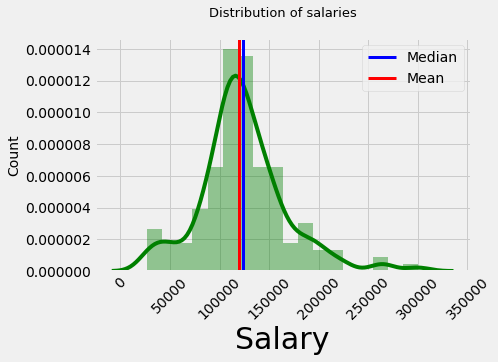

In [446]:
ax = sns.distplot(df.salary,color = 'green')
ax.set_title('Distribution of salaries\n', size = 13)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Salary', size = 30)
ax.axvline(df.salary.mean(), color = 'blue', linewidth = 3)
ax.axvline(df.salary.median(), color = 'red', linewidth = 3)
ax.legend(['Median', 'Mean'])
plt.xticks(rotation = 45)
plt.show()

Let's look at the average salaries for each of the cities that we identified for our scraping.

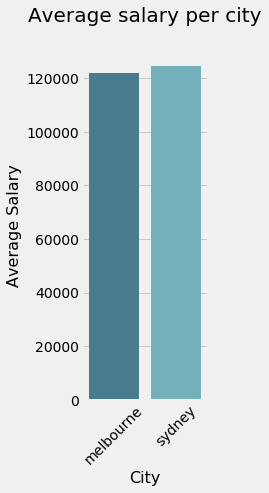

In [449]:
# Grouping salary by city and calculating the mean salary
mean_sal = df.groupby(['location'])['salary'].mean()

# Sort the salaries in decending order
#mean_sal.sort(ascending=False)

# Plot a barchart
fig=plt.figure(figsize=(2,6))
ax = sns.barplot(x = mean_sal.index, y = mean_sal.values, palette = 'GnBu_d',color = 'blue')
ax.set_title('Average salary per city\n', size = 20)
ax.set_ylabel('Average Salary', size = 16)
ax.set_xlabel('City', size = 16)
plt.xticks(rotation = 45)
plt.show()

from the above plot we can see that salaries are bit higher in sydney place

## Modelling

I want to predict a binary variable i.e. whether the salary was low or high.

For this I will need to calculate the median salary and create a new column that is 1** when the salary is high (above the median) and **0 when the salary is low (below the median)

In [400]:
# The function will calculate a binary output of the salary
def bin_salary(Salary):
    
    if Salary >= df.salary.median():
        return 1
    
    else:  
        return 0
    

# Create a new column in the dataframe and apply the binary function
df['Salary_Class'] = df.salary.apply(bin_salary)

In [401]:
print('Baseline accuracy:', np.mean(df.Salary_Class))

Baseline accuracy: 0.5165562913907285


### Logistic Regression using statsmodel

I will use the location as the variable in my first model, the location column will need to be converted into categorical. This will serve as the base for future models.

First I will look at the number salaries per city.

In [402]:
df.location.value_counts()

sydney       120
melbourne     31
Name: location, dtype: int64

The predicted baseline accuracy for the model is approx 50 percent. This is to be expected as the salaries have been split along the median and so half the salaries are below the median and half the salaries are above the median.



In [403]:
# Create new variables representing the each city 
city_cat = pd.get_dummies(df.location, prefix='City')

In [404]:
# Look at the new location variables
city_cat

,City_melbourne,City_sydney
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [405]:
# Define target and feature set for modelling
X = city_cat
y = df.Salary_Class

In [406]:
# Define the model 
logit = sm.Logit(y, X)

# Fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.692047
         Iterations 3


In [407]:
# Print the summary statistics for the model
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:           Salary_Class   No. Observations:                  151
Model:                          Logit   Df Residuals:                      149
Method:                           MLE   Df Model:                            1
Date:                Sun, 17 Feb 2019   Pseudo R-squ.:               0.0007974
Time:                        19:52:17   Log-Likelihood:                -104.50
converged:                       True   LL-Null:                       -104.58
                                        LLR p-value:                    0.6830
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
City_melbourne    -0.0645      0.359     -0.180      0.857      -0.769       0.640
City_sydney        0.1001      0.183      0.547      0.584      -0.258       0.458


## Odds Ratio

By taking the exponential of each of the coefficients we can generate the odds ratios. These tells you how a 1 unit increase or decrease in a variable affects the odds of getting a higher or lower salary.

This is a much easier to interept than looking at the coeffecients.

In [408]:
# Calculate the exponential of the coeffecients and sort in decending order
print(np.exp(result.params.sort_values(ascending = False)))

City_sydney       1.105263
City_melbourne    0.937500
dtype: float64


From the odds ratios we can see that see the odds of getting a higher salary in  sydney is bit higher than melbourne

## Creating new variables for the model

Using the Jobs column I will look for key words in the job titles using Count Vectoriser, extracting them to create new feature variables.

In [409]:
from sklearn.feature_extraction.text import CountVectorizer

In [410]:
cv = CountVectorizer(analyzer='word', max_features = 30, stop_words='english', ngram_range=(1,2))
jobs = cv.fit_transform(df['title']).todense()
job_dummies = pd.DataFrame(jobs, columns = cv.get_feature_names())

In [411]:
job_dummies.sum().sort_values(ascending=False)

data                 148
analyst               51
scientist             51
data scientist        51
engineer              40
data analyst          36
senior                34
senior data           27
data engineer         23
machine learning      15
machine               15
learning              15
analyst data           9
business               9
learning engineer      8
big                    8
big data               8
business analyst       7
analytics              6
scientist machine      6
super                  5
health                 5
junior                 5
junior data            5
sydney                 5
software               4
credit                 4
centre                 4
data analytics         4
leader                 4
dtype: int64

In [412]:
# First I will change all of the job titles to lowercase to make searching through them easier
df.title = df.title.apply(lambda x: x.lower())

In [413]:
# Create new columns for each of the new feature variables
# The colums will be 1 when the key word is found in job title and 0 if it isn't
# Some key words can be represented in different spellings, I will search for all
df['Job_Machine'] = df['title'].str.contains('|'.join(['machine','learning'])).astype(float)
df['Job_Data_scientitst'] = df['title'].str.contains('|'.join(['data','scientist'])).astype(float)
df['Job_Senior'] = df['title'].str.contains('|'.join(['senior', 'sr', 'sr.', 'lead'])).astype(float)
df['Job+Assistant'] = df['title'].str.contains('assistant').astype(float)
df['Job_Engineer'] = df['title'].str.contains('engineer').astype(float)
df['Job_Data'] = df['title'].str.contains('data').astype(float)
df['Job_Scientist'] = df['title'].str.contains('scientist').astype(float)
df['Job_Analyst'] = df['title'].str.contains('analyst').astype(float)
df['Job_Specialist'] = df['title'].str.contains('specialist').astype(float)
df['Job_Manager'] = df['title'].str.contains('manager').astype(float)

df['Job_Leader'] = df['title'].str.contains('leader').astype(float)


df['Job_junior'] = df['title'].str.contains('junior').astype(float)

In [414]:
# Define the new target and feature set for modelling
X = pd.concat([city_cat, df.drop(['location', 'title', 'company', 'summary', # Join the previous city variables
                                  'salary', 'Salary_Class'], axis = 1)], axis = 1) # and the new key word variables
y = df.Salary_Class


In [415]:
# Define the model 
logit = sm.Logit(y, X)
result = logit.fit(method='bfgs')

# Fit the model
#result = logit.fit( )

         Current function value: 0.439376
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40


/Volumes/ravi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [416]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:           Salary_Class   No. Observations:                  151
Model:                          Logit   Df Residuals:                      138
Method:                           MLE   Df Model:                           12
Date:                Sun, 17 Feb 2019   Pseudo R-squ.:                  0.3656
Time:                        19:58:03   Log-Likelihood:                -66.346
converged:                      False   LL-Null:                       -104.58
                                        LLR p-value:                 1.933e-11
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
City_melbourne          0.3380      4.737      0.071      0.943      -8.947       9.623
City_sydney             1.1454      4.721      0.243      0.808      -8.108      10.399
index           

In [417]:
# Calculate the exponential of the coeffecients and sort in decending order
print(np.exp(result.params.sort_values(ascending = False)))

Job_Machine            38.754283
Job_Senior             12.629180
Job_Leader              3.653460
City_sydney             3.143799
City_melbourne          1.402079
index                   1.003406
Job+Assistant           1.000000
Job_Scientist           0.634827
Job_Data_scientitst     0.528190
Job_Data                0.528190
Job_Engineer            0.236099
Job_Specialist          0.190125
Job_Analyst             0.074155
Job_junior              0.059750
Job_Manager             0.042438
dtype: float64


As predicted, senior job titles (leader, Senior),machine have the highest odds of getting a higher salary.

We also see that the ratios for sydney is higher than melbourne.

## Logistic Regression using sklearn

Using the feature variables obtained from the location and Job columns let's look at Logistic Regression using sklean.

In [418]:
# Define the new target and feature set for modelling
X = pd.concat([city_cat, df.drop(['location', 'title', 'company', 'summary', # Join the previous city variables
                                  'salary', 'Salary_Class'], axis = 1)], axis = 1) # and the new key word variables
y = df.Salary_Class


In [419]:
# Define the scaler
ss = StandardScaler()

# Scaling the feature set
Xs = ss.fit_transform(X)

/Volumes/ravi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Volumes/ravi/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


/Volumes/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7880794701986755


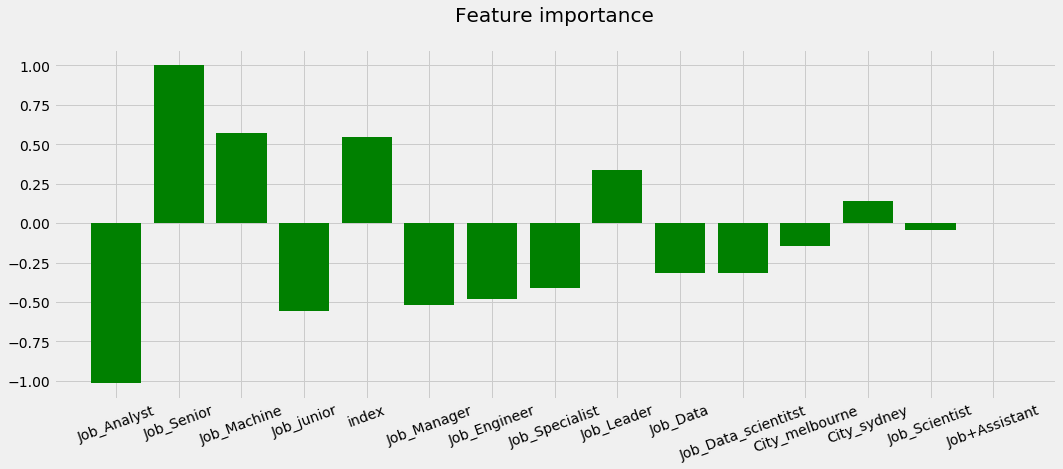

In [480]:
# Defining out model
# Using the standard paramaeters of the model
lr = LogisticRegression()

# Fitting the model with our target and features
model = lr.fit(Xs, y)
# Determins preditions from the model and print the accuracy of the model
predictions = model.predict(Xs)
print('Accuracy:', accuracy_score(y, predictions))

# Setting the feature importance to a variable
feat_importance = model.coef_
# Sorting the feature importance
indices = np.argsort(np.absolute(feat_importance))

# Plotting the feature importance
plt.figure(figsize = (16, 6))
plt.title("Feature importance\n", fontsize = 20)
#colors = ['red' if c < 0 else 'blue' for c in ]
plt.bar(range(Xs.shape[1]), feat_importance[0][indices][0][::-1], align="center",color = 'g')


plt.xticks(range(X.shape[1]), X.columns[indices][0][::-1], rotation=20)
plt.xlim([-1, X.shape[1]])
plt.show()

In [421]:
# Create a dataframe to display the odds ratio
odds_ratio = pd.DataFrame(np.transpose(model.coef_), index = X.columns, columns = ["Coeffecient value"])
# Create the odds colums by calculating the exponential of the coefficients
odds_ratio["Odds"] = odds_ratio["Coeffecient value"].apply(np.exp)
# Display the odds ratio
odds_ratio.sort_values(by = 'Odds', ascending = False)

,Coeffecient value,Odds
Job_Senior,1.000588,2.719882
Job_Machine,0.572943,1.773480
index,0.547164,1.728344
Job_Leader,0.333900,1.396403
City_sydney,0.141987,1.152561
Job+Assistant,0.000000,1.000000
Job_Scientist,-0.044931,0.956064
City_melbourne,-0.141987,0.867633
Job_Data_scientitst,-0.318388,0.727320
Job_Data,-0.318388,0.727320


The more senior job titles, machine learning and leader , the coeffcients are high

## Cross-validation using sklearn

Using cross-validation I will evaluate different metrics -

Accuracy = (TP+TN)/total
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
I will also plot a confusion matrix to understand these metrics better as well as a receiver operating characteristic (ROC) curve to look at the area under the curve (AUC)

In [422]:
# List the metrics for evaluation
metrics = ['accuracy', 'precision', 'recall']

# Define the model 
# Using L2 regularisation and 5-fold cross-validation
lg = LogisticRegressionCV(penalty = 'l2', cv = 5, solver = 'liblinear') 

# Loop through the different metrics and print the mean of the metric after the 5-fold cross-validation
for metric in metrics:
    
    scores = cross_val_score(lg, Xs, y, scoring = metric, cv = 5)
    
    print(metric, ':' , scores.mean())

accuracy : 0.7085650723025584
precision : 0.8253968253968255
recall : 0.6599999999999999


In [423]:
# Define a function for plotting confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix for high/low salaries\n', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True salary')
    plt.xlabel('Predicted salary')
    plt.show()
    return

In [424]:
import itertools

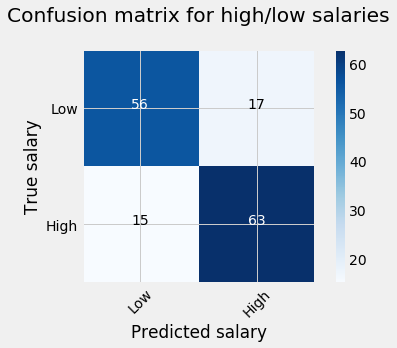

In [484]:
# Plot confusion matrix
cnf_matrix = confusion_matrix(y, model.predict(Xs))
plot_confusion_matrix(cnf_matrix, classes= ['Low', 'High'])

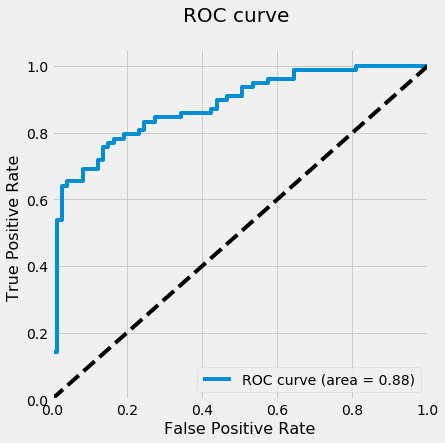

In [426]:
# Plot ROC curve
FPR, TPR, THR = roc_curve(y, model.predict_proba(Xs)[:,1])
ROC_AUC = auc(FPR, TPR)

plt.figure(figsize=[6,6])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth = 4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate ', fontsize=16)
plt.title('ROC curve \n', fontsize=20)
plt.legend(loc="lower right")
plt.show()

The accuracy answers the question - Overall, how often is the classifier correct?

- For this model the accuracy score was 0.70 which is higher than the baseline accuracy for the model. This means that model is better at predicting high salaries than random choice 
The precision answers the question - When it predicts yes, how often is it correct?

- The score for the precision on this model was ~0.82
The recall answers the question - When it's actually yes, how often does it predict yes?

- The score for the recall on this model was 0.65, which is not very similar to the precision

Comparison of L1 and L2 regularization for this logistic regression model

I will calculate the logistic regression for L1 and L2 penalties and compare the effect this has on the coeffecients.

L1 regularisation - Lasso

In [427]:
# Define the model 
# Using L1 regularisation and solver = liblinear as this is better for smaller datasets
lg1 = LogisticRegression(penalty = 'l1', solver = 'liblinear')

# Fit the model with our target and features
lg1.fit(Xs, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [428]:
# List the metrics for evaluation again
metrics = ['accuracy', 'precision', 'recall']

# Loop through the different metrics and print the mean of the metric after the 5-fold cross-validation
for metric in metrics:
    
    scores = cross_val_score(lg1, Xs, y, scoring = metric, cv = 5)
    
    print(metric, ':' , scores.mean())

accuracy : 0.6754171301446051
precision : 0.7610012210012209
recall : 0.6325000000000001


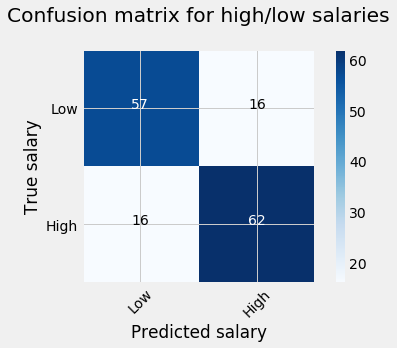

In [490]:
# Plot confusion matrix
cnf_matrix = confusion_matrix(y, lg1.predict(Xs))
plot_confusion_matrix(cnf_matrix, classes= ['Low', 'High'])


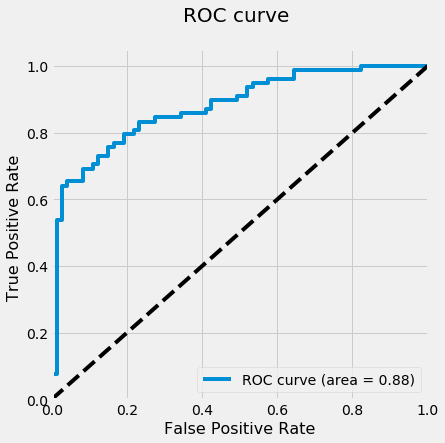

In [430]:
# Plot ROC curve
FPR, TPR, THR = roc_curve(y, lg1.predict_proba(Xs)[:,1])
ROC_AUC = auc(FPR, TPR)

plt.figure(figsize=[6,6])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth = 4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate ', fontsize=16)
plt.title('ROC curve \n', fontsize=20)
plt.legend(loc="lower right")
plt.show()

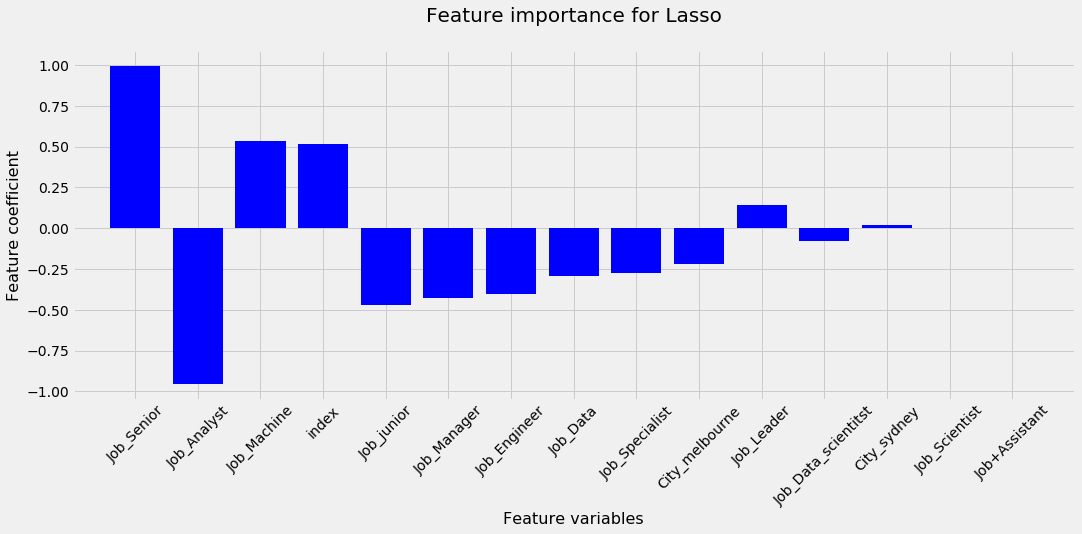

In [491]:
# Setting the feature importance to a variable
feat_importance = lg1.coef_
# Sorting the feature importance
indices = np.argsort(np.absolute(feat_importance))

# Plotting the feature importance
plt.figure(figsize = (16, 6))
plt.title("Feature importance for Lasso\n", fontsize = 20)
plt.bar(range(Xs.shape[1]), feat_importance[0][indices][0][::-1], align="center",color = 'blue')
plt.ylabel('Feature coefficient', size = 16)
plt.xlabel('Feature variables', size = 16)
plt.xticks(range(X.shape[1]), X.columns[indices][0][::-1], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

## L2 regularisation - Ridge

In [432]:
# Define the model 
# Using L2 regularisation and solver = liblinear as this is better for smaller datasets
lg2 = LogisticRegression(penalty = 'l2', solver = 'liblinear')

# Fit the model with our target and features
lg2.fit(Xs, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## L2 regularisation metrics

In [433]:
# List the metrics for evaluation again
metrics = ['accuracy', 'precision', 'recall']

# Loop through the different metrics and print the mean of the metric after the 5-fold cross-validation
for metric in metrics:
    
    scores = cross_val_score(lg2, Xs, y, scoring = metric, cv = 5)
    
    print(metric, ':' , scores.mean())

accuracy : 0.6625139043381536
precision : 0.7425396825396826
recall : 0.6325000000000001


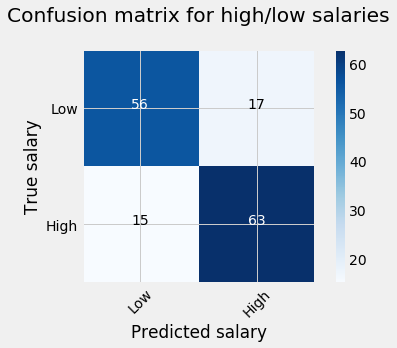

In [434]:
# Plot confusion matrix
cnf_matrix = confusion_matrix(y, lg2.predict(Xs))
plot_confusion_matrix(cnf_matrix, classes= ['Low', 'High'])

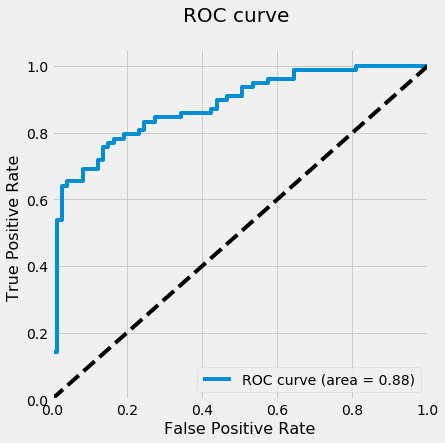

In [435]:
# Plot ROC curve
FPR, TPR, THR = roc_curve(y, lg2.predict_proba(Xs)[:,1])
ROC_AUC = auc(FPR, TPR)

plt.figure(figsize=[6,6])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth = 4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate ', fontsize=16)
plt.title('ROC curve \n', fontsize=20)
plt.legend(loc="lower right")
plt.show()

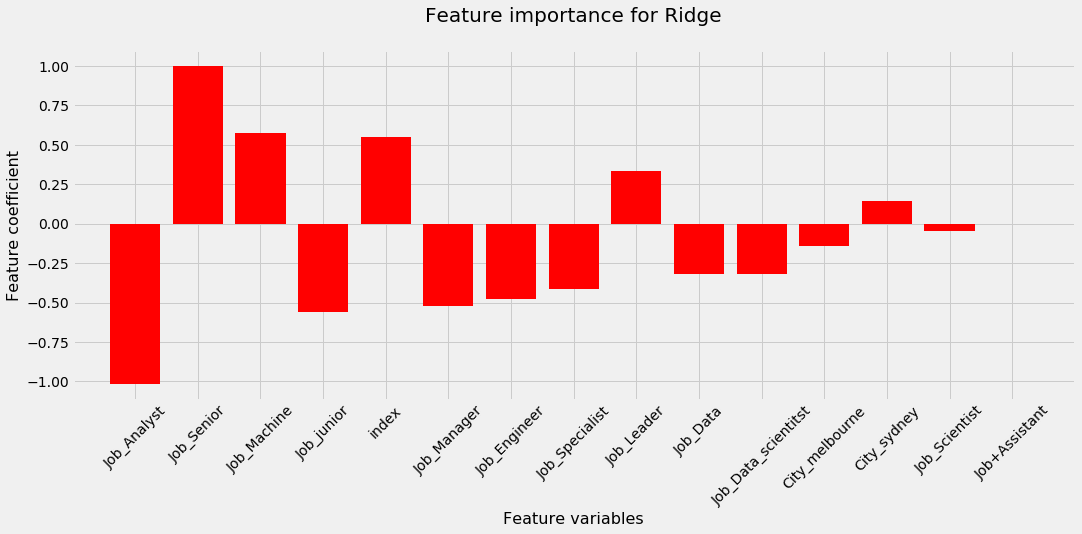

In [492]:
# Setting the feature importance to a variable
feat_importance = lg2.coef_
# Sorting the feature importance
indices = np.argsort(np.absolute(feat_importance))

# Plotting the feature importance
plt.figure(figsize = (16, 6))
plt.title("Feature importance for Ridge\n", fontsize = 20)
plt.bar(range(Xs.shape[1]), feat_importance[0][indices][0][::-1], align="center",color = 'red')
plt.ylabel('Feature coefficient', size = 16)
plt.xlabel('Feature variables', size = 16)
plt.xticks(range(X.shape[1]), X.columns[indices][0][::-1], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

Comparing L1 and L2 coeffecients

In [437]:
# Create a dataframe to display the l1 and l2 coeffecients
comparison = pd.DataFrame(np.transpose(lg1.coef_), index = X.columns, columns = ["Lasso (l1)"])
# Add the l2 coeffecient values to the dataframe
comparison['Ridge (l2)'] = lg2.coef_[0]
# Display the comparison
comparison

,Lasso (l1),Ridge (l2)
City_melbourne,-0.218571,-0.141987
City_sydney,0.022546,0.141987
index,0.514984,0.547164
Job_Machine,0.531830,0.572943
Job_Data_scientitst,-0.076795,-0.318388
Job_Senior,0.994954,1.000588
Job+Assistant,0.000000,0.000000
Job_Engineer,-0.401645,-0.479744
Job_Data,-0.290840,-0.318388
Job_Scientist,0.000000,-0.044931


Comparing L1 and L2 regularisation, there is definite shrinkage in the coefficient values from the previous two models, statsmodel and sklearn. Senior, engineer and data key words from the job titles come in highest for both l1 and l2.
Looking at the the accuracy, precision and recall metrics for l1 and l2 we can see that they have improved the previous models

## BONUS

Using Count Vectorizer to create features from the text summaries.

In [325]:
# Using Countvectorize on the Summary, taking out common words with a maximum word length 2 
# and max number of features as 5
cv = CountVectorizer(stop_words = 'english', max_features = 10, ngram_range = (1, 4), binary=True)
top_words = cv.fit_transform(df.summary).todense()

In [326]:
# Create a dataframe from the top
top_words = pd.DataFrame(top_words, columns=cv.get_feature_names())
print('The top 10 words are:\n', top_words.columns.unique())

The top 10 words are:
 Index(['analyst', 'business', 'data', 'data analyst', 'data scientist',
       'experience', 'scientist', 'senior', 'team', 'working'],
      dtype='object')


In [327]:
# First I will change all of the summary to lowercase to make searching through them easier
df.summary = df.summary.apply(lambda x: x.lower())

In [328]:
# Create new columns for each of the new feature variables
# The colums will be 1 when the key word is found in job title and 0 if it isn't
# Some key words can be represented in different spellings, I will search for all
df['Job_business'] = df['summary'].str.contains('business').astype(float)
df['Job_Senior'] = df['summary'].str.contains('|'.join(['senior', 'sr', 'sr.', 'lead'])).astype(float)
df['data_scientist'] = df['summary'].str.contains('|'.join(['data', 'scientist'])).astype(float)
df['Job_experience'] = df['summary'].str.contains('experience').astype(float)
df['Job_Data'] = df['summary'].str.contains('data').astype(float)
df['Job_Scientist'] = df['summary'].str.contains('scientist').astype(float)
df['summary_Analyst'] = df['summary'].str.contains('analyst').astype(float)
df['Job_Specialist'] = df['summary'].str.contains('|'.join(['data', 'analyst'])).astype(float)
df['Job_join'] = df['summary'].str.contains('join').astype(float)
df['Job_team'] = df['summary'].str.contains('team').astype(float)

In [329]:
# Redefine the target and predictor variables
X = pd.concat([top_words, city_cat, df.drop(['location', 'title', 'company', 'summary', # Join the previous city variables
                                  'salary', 'Salary_Class'], axis = 1)], axis = 1) # and the new key word variables
y = df.Salary_Class

In [330]:
ss = StandardScaler()
Xs = ss.fit_transform(X)
lr = LogisticRegressionCV(penalty = 'l2', cv = 5, Cs = 10)

# Fit the model with our target and features
lr.fit(Xs, y)

for metric in metrics:
    scores = cross_val_score(lr, Xs, y, scoring = metric, cv = 5)
    print(metric, scores.mean())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [280]:
# Plot confusion matrix

cnf_matrix = confusion_matrix(y, lr.predict(Xs))
plot_confusion_matrix(cnf_matrix, classes= ['Low', 'High'])

NotFittedError: This LogisticRegressionCV instance is not fitted yet

## Summary

### Introduction
The aim of the project was to collect salary data from Indeed.com and look for relationships between features in job listings and the salaries for those jobs. The task was aimed at predicting Data Science salaries, so the search was focused in this field. The search was also targeted at the cities for Melbourne and Sydney.

The result of the investigation identified features in the job listing that were associated with highed salaries, these features related to job titles, location. These includes the cities of Melbourne and Sydney.

### Method
Using Beautiful Soup, 5729 job listings were scraped from 2 cities on Indeed.com.au Five functions were used to extract - location, company, title, salary and summary. These were cleaned and listings without salaries were deleted as most listings DID NOT come with salary information, this left 151 job listings remaining to perform modelling on.

Although linear regression could have been used the task was converted into classification and Logistic Regression used instead. The salary information was converted into a binary high/low feature with all salaries above the median equalling 1.

Modelling of the different features (job titles, location ) was performed to identify the most relevant features for predicting salary.

### Results
logistic regression  model were run on the scraped features from Indeed.com.au to predict the key features that impact recieving a high salary the most.

It was identified that the following features contributed the most - 


**Job title**
- Senior
- Machine learniing engineer
- leader

**City**
- Sydney